# Applied Linear Algebra : Part - 1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Vector

A vector is a one-dimensional array of numbers.
$$ v = [1,2,3,4,5] $$

In [3]:
v = np.array(list(range(1,6)))
print(v)

[1 2 3 4 5]


In [17]:
m = np.array([ 
    list(range(0,5)), 
    list(range(10,15)), 
    list(range(15,20))
])

m

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

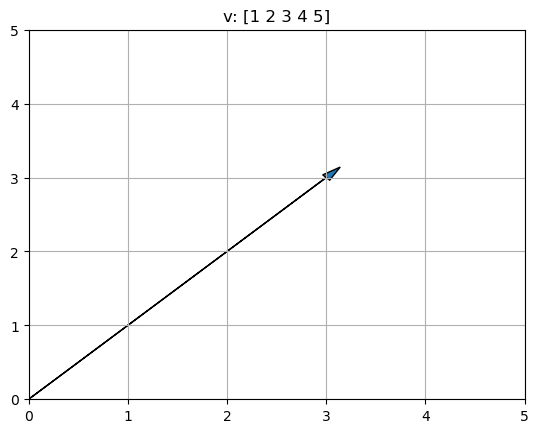

In [5]:
plt.title(f"v: {v}") 
plt.xlim(0, 5)
plt.ylim(0, 5)

plt.arrow(0, 0, v[2], v[2], head_width=0.1, head_length=0.2)  # draw arrow
plt.grid()

### Vector length formula
$$||x||_{2} = \sqrt{x_{1}^{2} + x_{2}^{2} + \cdots + x_{n}^{2}}$$


In [6]:
np.sqrt(np.sum(v**2))

7.416198487095663

### 3d Projection

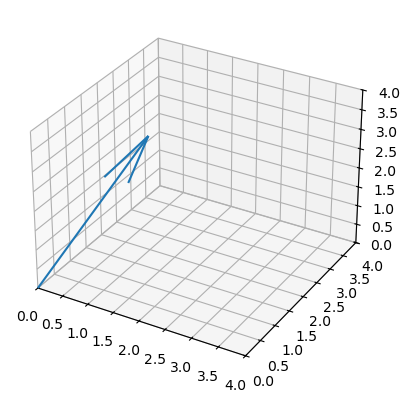

In [7]:
v = np.array(list(range(1,6)))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([0, 4])
ax.set_ylim([0, 4])
ax.set_zlim([0, 4])

ax.quiver(0, 0, 0, v[0], v[1], v[2], length=1)

## Vector Operations

[0.5 0.5]


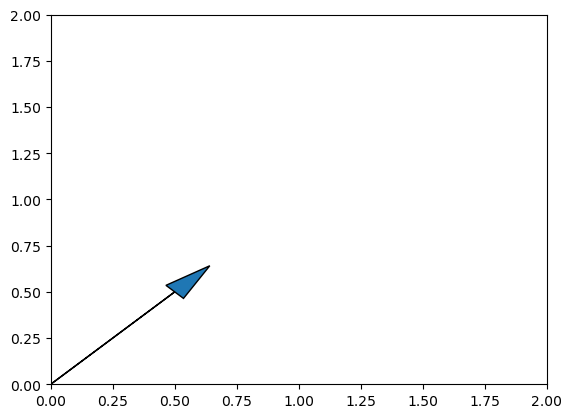

In [8]:
v = np.array([1,1]) * .5

plt.xlim(0, 2)
plt.ylim(0, 2)

plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2)
print(v)

[2 1]


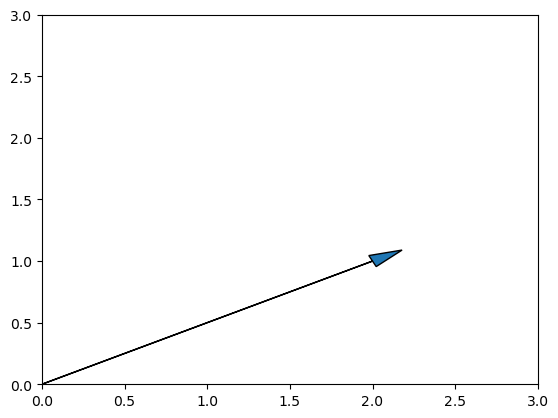

In [9]:
v = np.array([1,1]) +  np.array([1, 0])
print(v)

plt.xlim(0, 3)
plt.ylim(0, 3)

plt.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.2)

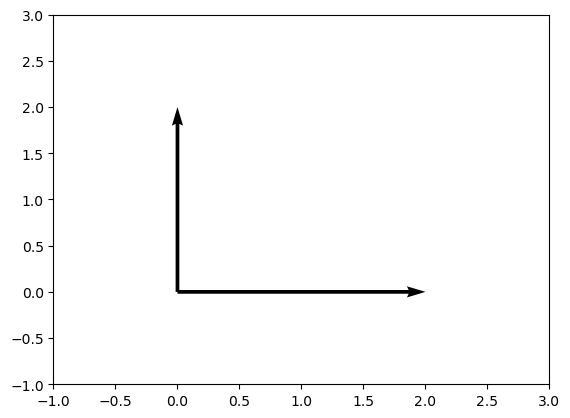

In [10]:
v1 = np.array([2,0])
v2 = np.array([0,2])

plt.xlim(-1, 3)  # set x-axis limits
plt.ylim(-1, 3)  # set y-axis limits

# Plot the arrows with plt.quiver
plt.quiver([0,0], [0,0], [v1[0],v2[0]], [v1[1],v2[1]], angles='xy', scale_units='xy', scale=1)

In [11]:
np.dot(v1, v2)

0

## Matrices 

In [12]:
matx = m
matx

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [13]:
matx.shape

(3, 5)

In [14]:
matx[2,4] = 200
matx

array([[  0,   1,   2,   3,   4],
       [ 10,  11,  12,  13,  14],
       [ 15,  16,  17,  18, 200]])

## Linear Regression

In [19]:
data = pd.read_csv("../../data/clean_weather.csv")
data = data.ffill()
data

,Unnamed: 0,tmax,tmin,rain,tmax_tomorrow
0,1970-01-01,60.0,35.0,0.0,52.0
1,1970-01-02,52.0,39.0,0.0,52.0
2,1970-01-03,52.0,35.0,0.0,53.0
3,1970-01-04,53.0,36.0,0.0,52.0
4,1970-01-05,52.0,35.0,0.0,50.0
...,...,...,...,...,...
13504,2022-11-22,62.0,35.0,0.0,67.0
13505,2022-11-23,67.0,38.0,0.0,66.0
13506,2022-11-24,66.0,41.0,0.0,70.0
13507,2022-11-25,70.0,39.0,0.0,62.0


### Vector multiplication

In [24]:
w = np.array([.7, .3, .1])
x = np.array([52, 39, 0])

# Multiply w and x elementwise
np.dot(w, x)

48.099999999999994

### Matrix Multiplication

Matrix multiplication is a linear algebra operation defined like this:

$$
\begin{equation}
    A \times B =
    \begin{bmatrix}
      a_{11} & a_{12} \\
      a_{21} & a_{22}
    \end{bmatrix}
    \times
    \begin{bmatrix}
    b_{11} \\
    b_{21}
    \end{bmatrix}
    =
    \begin{bmatrix}
      a_{11}b_{11} + a_{12}b_{21} \\
      a_{21}b_{11} + a_{22}b_{21}
    \end{bmatrix}
\end{equation}
$$

In [25]:
X = data[
    ["tmax", "tmin", "rain"]
    ].iloc[:3].to_numpy()
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [26]:
print(X.shape, w.shape)
w

(3, 3) (3,)


array([0.7, 0.3, 0.1])

In [27]:
W = w.reshape(3, 1)
W

array([[0.7],
       [0.3],
       [0.1]])

In [28]:
W.shape

(3, 1)

In [29]:
b = np.array([10])
X @ W + b # Same as np.dot(X, W)

array([[62.5],
       [58.1],
       [56.9]])

### The Normal Equation

$$w = (X^T X)^{-1} X^T Y $$

#### Matrix Transposition

$$ X^T $$

In [49]:
W

array([[0.7],
       [0.3],
       [0.1]])

In [50]:
W.T

array([[0.7, 0.3, 0.1]])

In [51]:
X

array([[60., 35.,  0.],
       [52., 39.,  0.],
       [52., 35.,  0.]])

In [46]:
X.T

array([[60., 52., 52.],
       [35., 39., 35.],
       [ 0.,  0.,  0.]])

In [52]:
# Use .T to get the transpose of a matrix
W.T @ X.T + b

array([[62.5, 58.1, 56.9]])

In [53]:
# The numpy allclose function tells us if two matrices are approximately equal
np.allclose((W.T @ X.T).T, X @ W)

True

In [54]:
X @ W

array([[52.5],
       [48.1],
       [46.9]])

### Matrix Inversion

You may have also noticed this term in the normal equation - $(X^T X)^{-1}$. This is called *matrix inversion*.  The inverse of a matrix is similar to the inverse of a number.  For example, the inverse of `4` is `1/4`, and `4 * 1/4` equals `1`.  $X \cdot X^{-1}$ is equal to the identity matrix, $I$.  The identity matrix is a matrix with 1s on the diagonal, and 0s everywhere else.  It's a way to represent the number 1 in matrix form.

Here's the `3x3` identity matrix:

In [63]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [66]:
np.linalg.inv(X)

LinAlgError: Singular matrix

In [69]:
# This matrix is singular
np.array([[1, 2], [2, 4]])

array([[1, 2],
       [2, 4]])

In [70]:
# This matrix is not singular
np.array([[1, 2], [3, 6]])

array([[1, 2],
       [3, 6]])

### Singular matrix

A singular matrix is a square matrix that does not have an inverse. This occurs when its determinant is zero, indicating that the rows or columns are linearly dependent, meaning one row or column can be expressed as a linear combination of others.

#### For a 2x2 Matrix
For a matrix $$ A = \begin{pmatrix} a & b \\ c & d \end{pmatrix} $$
1. Calculate the determinant: $$ \text{det}(A) = ad - bc .$$
2. If the determinant is non-zero, use the formula:
   $$ A^{-1} = \frac{1}{\text{det}(A)} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix} $$


In [72]:
# Add a ridge to the diagonal of the matrix
np.linalg.inv(X + 0.1 * np.eye(3))

array([[ 0.07378611, -0.06604895,  0.        ],
       [-0.09812987,  0.11341549,  0.        ],
       [-4.02332472, -5.34996509, 10.        ]])

In [74]:
# This returns the identity matrix
ridge = X + 0.1 * np.eye(3)
ridge @ np.linalg.inv(ridge)

array([[ 1.00000000e+00,  5.41233725e-16,  0.00000000e+00],
       [ 1.06185910e-16,  1.00000000e+00,  0.00000000e+00],
       [-1.12317084e-17,  5.25413240e-16,  1.00000000e+00]])